In [26]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import folium

In [40]:
import pandas as pd

In [66]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [53]:
df = pd.read_csv('/content/gdrive/MyDrive/데이터시각화(02)/개인/소상공인시장진흥공단_상가(상권)정보_경기_202303.csv')
df.head(3)

<ipython-input-53-393032374ecd>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/gdrive/MyDrive/데이터시각화(02)/개인/소상공인시장진흥공단_상가(상권)정보_경기_202303.csv')


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0004063,팽성농산물센터,NaN,G2,소매,G205,식료품 소매,G20506,채소/과일 소매업,G47215,...,4122025039100930001033303,NaN,경기도 평택시 팽성읍 석근2길 36,451803,17997,NaN,NaN,NaN,127.048075,36.936336
1,MA0101202210A0089792,역전할머니맥주평택궁리점,NaN,I2,음식,I211,주점,I21103,생맥주 전문,I56213,...,4122033026100720011024544,NaN,경기도 평택시 고덕면 궁2길 67,451841,17821,NaN,NaN,NaN,127.034381,37.018039
2,MA0101202210A0101847,지제역부동산마트공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,4122011900100000000000107,NaN,경기도 평택시 지제동삭2로 181-24,450802,18029,NaN,1,NaN,127.093832,37.016832


In [54]:
pd.Series(df.columns)

0        상가업소번호
1           상호명
2           지점명
3     상권업종대분류코드
4      상권업종대분류명
5     상권업종중분류코드
6      상권업종중분류명
7     상권업종소분류코드
8      상권업종소분류명
9      표준산업분류코드
10      표준산업분류명
11         시도코드
12          시도명
13        시군구코드
14         시군구명
15        행정동코드
16         행정동명
17        법정동코드
18         법정동명
19         지번코드
20       대지구분코드
21        대지구분명
22        지번본번지
23        지번부번지
24         지번주소
25        도로명코드
26          도로명
27        건물본번지
28        건물부번지
29       건물관리번호
30          건물명
31        도로명주소
32        구우편번호
33        신우편번호
34          동정보
35          층정보
36          호정보
37           경도
38           위도
dtype: object

In [55]:
sub_df = df.loc[df['행정동명'].isin(['백현동', '정자동', '삼평동'])]
sub_df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
113,MA010120220805434195,노나머그,NaN,M1,과학·기술,M112,전문 디자인,M11203,시각 디자인업,M73203,...,4113511000105290000000001,SKHUB오피스텔,경기도 성남시 분당구 판교역로 109,463420,13531,NaN,NaN,NaN,127.108615,37.390884
254,MA010120220805437451,지에스25분당느티,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,4113510300100660013020235,NaN,경기도 성남시 분당구 느티로69번길 5,463874,13610,NaN,NaN,NaN,127.112237,37.369078
584,MA010120220805442487,준오헤어,NaN,S2,수리·개인,S207,이용·미용,S20701,미용실,S96112,...,4113511000100000000000001,알파돔타워,경기도 성남시 분당구 판교역로 152,463420,13529,NaN,3,NaN,127.110292,37.394240


In [56]:
sub_df[['위도', '경도', '상호명']]

,위도,경도,상호명
113,37.390884,127.108615,노나머그
254,37.369078,127.112237,지에스25분당느티
584,37.394240,127.110292,준오헤어
589,37.400251,127.106878,종로계림닭도리탕원조
592,37.372010,127.112632,씨유분당정자
...,...,...,...
553264,37.369089,127.113615,어나더베이크
553387,37.392484,127.110437,스페이스메이커즈
553412,37.387767,127.114614,주도피아Judopia이경근유도관
553761,37.370666,127.114827,와이알렌터카


In [58]:
from folium.plugins import MarkerCluster

# 위도
latitude = 37.394946
# 경도
longitude = 127.111104

m = folium.Map(
    location=[latitude, longitude],
    zoom_start=15
)

coords = sub_df[['위도', '경도']]


marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)
m

Output hidden; open in https://colab.research.google.com to view.

In [41]:
import requests
import json

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content

seoul_geo = json.loads(c)

In [43]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m

In [44]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='Stamen Toner'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m

In [45]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m

In [47]:
plt.rc('font', family='NanumBarunGothic') 

In [67]:
seoul = '/content/gdrive/MyDrive/데이터시각화(02)/개인/소상공인시장진흥공단_상가(상권)정보_서울_202303.csv'

In [68]:
seoul = seoul[['시군구명', '상권업종대분류명', '상권업종중분류명', '위도', '경도']]
seoul

TypeError: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

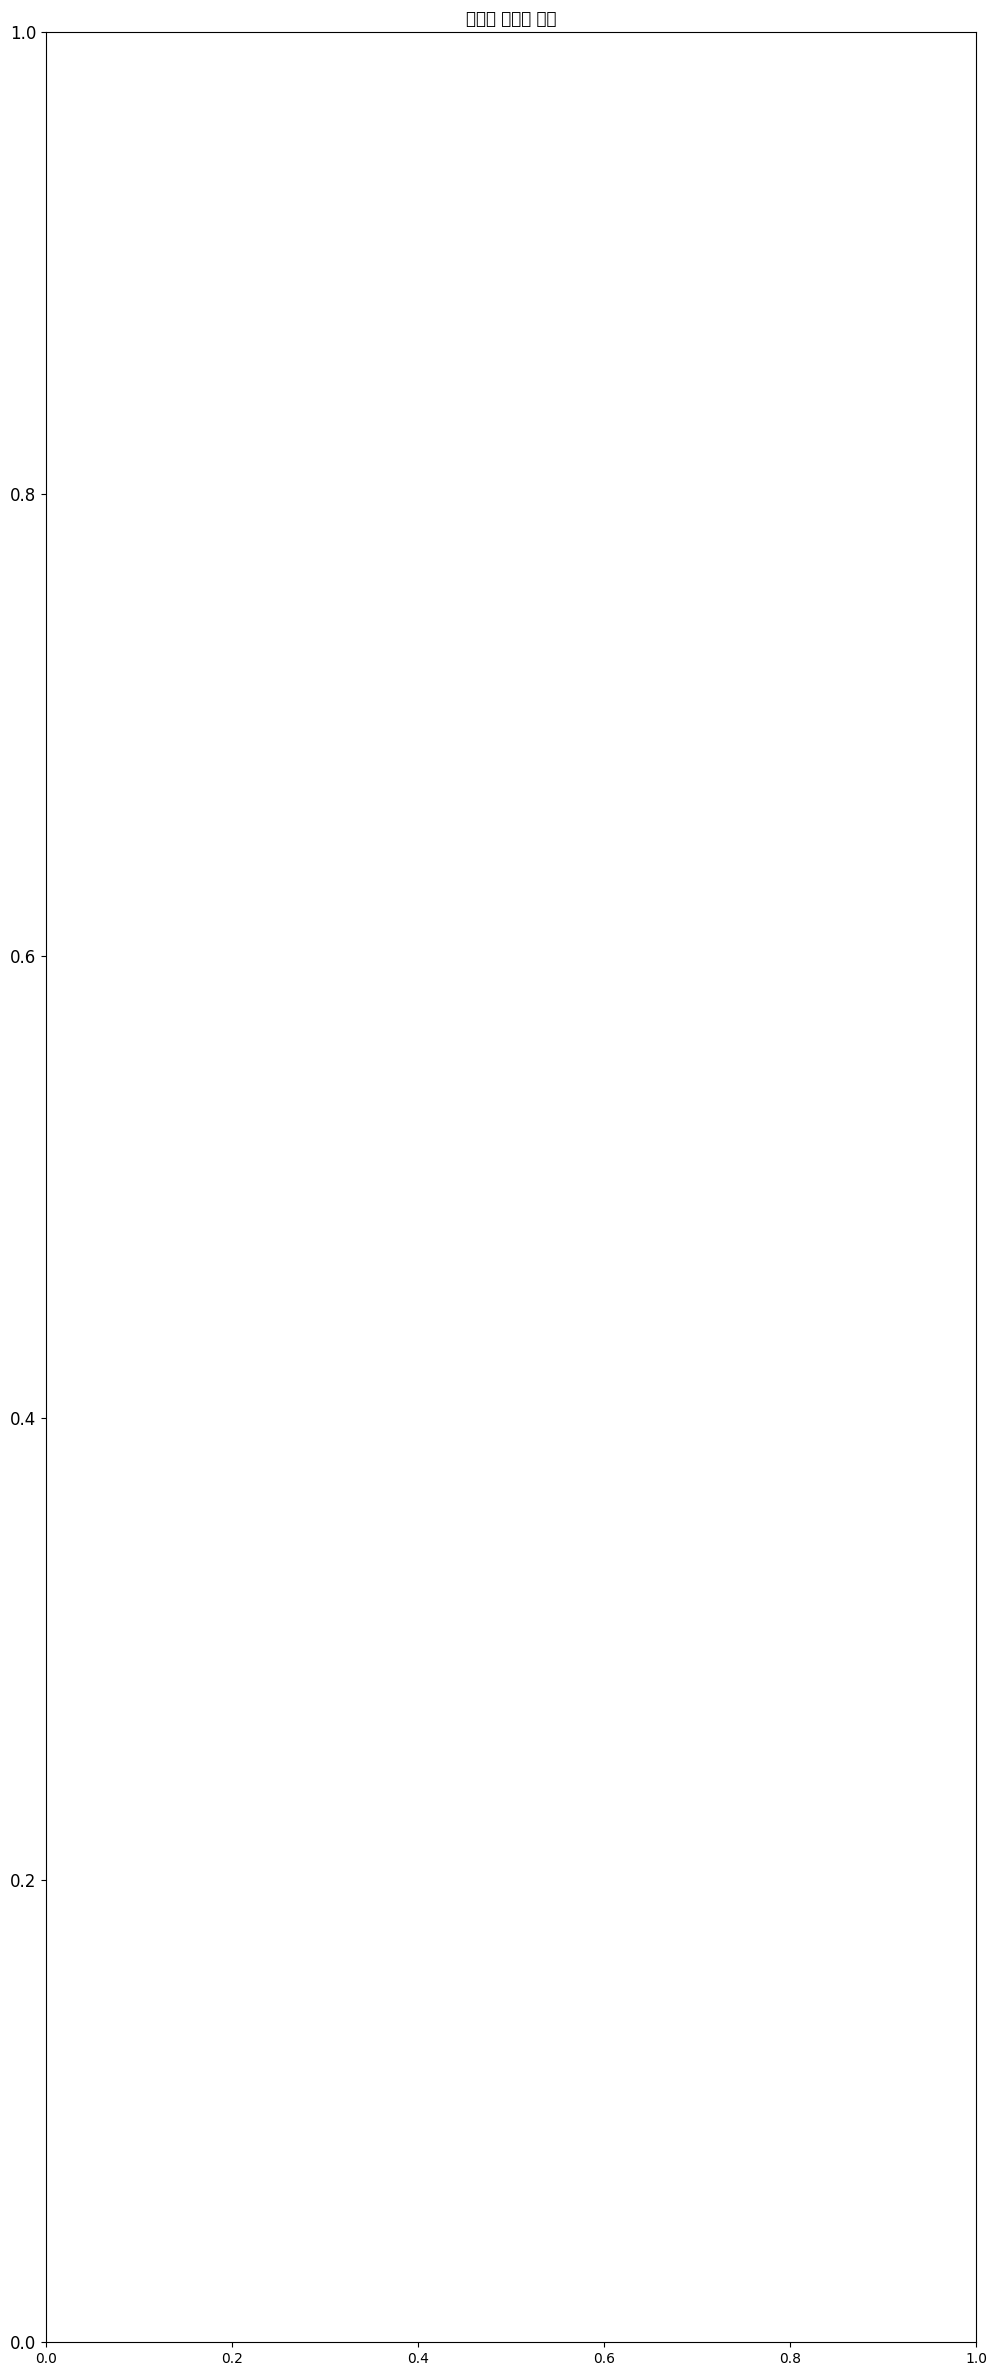

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(12, 30))
sns.countplot(y=seoul['상권업종중분류명'], order=seoul['상권업종중분류명'].value_counts().index)
plt.yticks(fontsize=12)
plt.title('서울시 업종별 개수')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52964 (\N{HANGUL SYLLABLE KEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

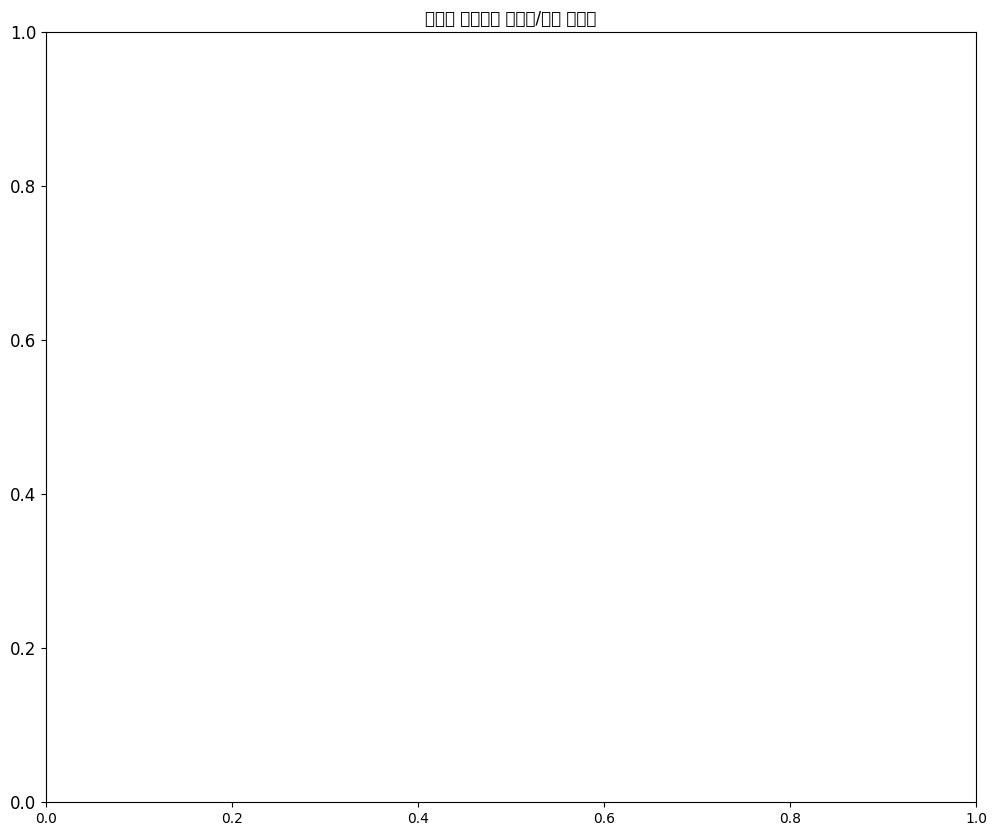

In [71]:
plt.figure(figsize=(12, 10))
seoul.loc[seoul['상권업종중분류명'] == '커피점/카페'].groupby('시군구명')['상권업종대분류명'].count()\
                                                     .sort_values().plot(kind='barh', color='royalblue')
plt.yticks(fontsize=12)
plt.title('서울시 자치구별 커피점/카페 업종수')
plt.show()

In [74]:
seoul_coffee = seoul.loc[seoul['상권업종중분류명'] == '커피점/카페']
seoul_coffee

In [75]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=12, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(seoul_coffee['위도'], seoul_coffee['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)

m

In [ ]:
seoul_group_data = seoul.loc[seoul['상권업종중분류명'] == '커피점/카페'].groupby('시군구명')['상권업종중분류명'].count()
seoul_group_data

In [ ]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=seoul_group_data, 
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 커피 업종 수"
            )
m

In [ ]:
bins = list(seoul_group_data.quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=seoul_group_data, 
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 커피 업종 수", 
             bins=bins
            )
m

In [ ]:
m.save('map.html')